In [48]:
from gurobipy import *
import numpy as np
import time
from collections import defaultdict



# Problema 1

In [25]:
#Abrir un archivo excel
import pandas as pd

#como leer un archivo .csv
data = pd.read_csv('clientes2.csv', sep=';')
print(data)


            x         y   demanda
0      7,9744  -11,3045   147,199
1    -13,6786   -3,3825   161,327
2     -8,8032  -10,3279  172,4834
3    -15,3621    9,4144  133,8201
4     -9,0891   -7,9311  129,8221
..        ...       ...       ...
995   -6,2143    -10,86  155,4059
996  -11,7203   -2,1472  132,1921
997    6,4149    7,9825  126,1607
998    5,9054   12,7097  156,3924
999   -9,4583   -7,1544  141,3835

[1000 rows x 3 columns]


## Pre-procesamiento

In [26]:
for i in range(len(data)):
    for j in range(len(data.columns)):
        valor = data.iloc[i,j]
        valor = valor.replace(",",".")
        data.iloc[i,j] = valor
data = data.applymap(float)

# data = data.iloc[0:100]
print(data)

           x        y   demanda
0     7.9744 -11.3045  147.1990
1   -13.6786  -3.3825  161.3270
2    -8.8032 -10.3279  172.4834
3   -15.3621   9.4144  133.8201
4    -9.0891  -7.9311  129.8221
..       ...      ...       ...
995  -6.2143 -10.8600  155.4059
996 -11.7203  -2.1472  132.1921
997   6.4149   7.9825  126.1607
998   5.9054  12.7097  156.3924
999  -9.4583  -7.1544  141.3835

[1000 rows x 3 columns]


### Pregunta 1

Programar una función que reciba un centro aleatorio (x,y) y un conjunto de datos de clientes con sus pesos. Definiendo como método de detención que la diferencia de coordenadas entre iteraciones no sea mayor que 1*10^-5. El algoritmo debe reportar la ubicación óprima, el tiempo de ejecución y el número de iteraciones realizadas para encontrar el óptimo

In [27]:
import random
import time

def centro_euclidiano(x=0, y=0, data=0, logs = True):
    
    data = data.reset_index(drop=True)
    
    x_new = x+1
    y_new = y+1

    x_i = data.iloc[:,0]
    y_i = data.iloc[:,1]
    pesos = data.iloc[:,2]
    contador = 0
    time_0 = time.time()
    while (abs(x-x_new)>0.00001 and abs(y-y_new)>0.00001):
        contador += 1
        sum = 0
        sum_new_x = 0
        sum_g_i = 0
        sum_new_y = 0
        for i in range(len(data)):
        
            distancia = ((x-float(x_i[i]))**2+(y-float(y_i[i]))**2)**(1/2)
            fx = float(pesos[i])*distancia
            sum += fx
            
            g_i= (pesos[i]/distancia)
            
            sum_new_x += (x_i[i]*g_i)
            sum_new_y += (y_i[i]*g_i)
            sum_g_i += g_i
            time_n = time.time()
            
        x, y = x_new, y_new
        x_new = sum_new_x/sum_g_i
        y_new = sum_new_y/sum_g_i
        tiempo = time_n-time_0
    if logs:
        print(f'El modelo de localización arrojó las coordenadas x: {x_new} y: {y_new}')
        print(f'El modelo se demoró un tiempo de {tiempo} segundos y {contador} iteraciones')
    return x_new, y_new, tiempo, contador


x=random.randint(-2,2)
y=random.randint(-2,2)
posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data)

    

El modelo de localización arrojó las coordenadas x: -2.1911576964434 y: -4.507444623174453
El modelo se demoró un tiempo de 0.36936283111572266 segundos y 36 iteraciones


### Pregunta 1.2
Usando los datos de 'clientes2.csv' y tomando una muestra de 250 clientes al azar, realice 100 repeticiones del algoritmo partiendo desde distintos puntos aleatorios. Reporte los estadísticos básicos (media, desviación, gráfico box plot) para los tiempos de ejecución y número de iteraciones

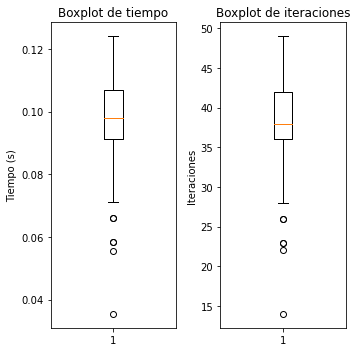

                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean     1.822162   -4.305951    0.096928    38.000000
std      0.016036    0.000882    0.015076     5.880974
min      1.783684   -4.311173    0.035417    14.000000
25%      1.819813   -4.306014    0.091257    36.000000
50%      1.820979   -4.305936    0.098048    38.000000
75%      1.821751   -4.305816    0.106808    42.000000
max      1.960553   -4.302191    0.124044    49.000000
           x         y    tiempo  iteraciones
0   1.821346 -4.305973  0.107861         42.0
1   1.819748 -4.305810  0.111540         44.0
2   1.821954 -4.306035  0.091467         36.0
3   1.819943 -4.305830  0.112052         44.0
4   1.807117 -4.304497  0.058460         23.0
..       ...       ...       ...          ...
95  1.820315 -4.305868  0.123942         49.0
96  1.820975 -4.305935  0.103484         40.0
97  1.820553 -4.305892  0.102576         39.0
98  1.810727 -4.304913  0.058367         23.0

In [28]:
import matplotlib.pyplot as plt

data_sample = data.sample(n=250)


max_value_x = round(data_sample.iloc[:,0].max())
min_value_x = round(data_sample.iloc[:,0].min())
max_value_y = round(data_sample.iloc[:,1].max())
min_value_y = round(data_sample.iloc[:,1].min())

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_sample, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]
    

fig, axes = plt.subplots(1,2,figsize=(5,5))

axes[0].boxplot(df_estadisticos['tiempo'])
axes[0].set_title('Boxplot de tiempo')
axes[0].set_ylabel('Tiempo (s)')

axes[1].boxplot(df_estadisticos['iteraciones'])
axes[1].set_title('Boxplot de iteraciones')
axes[1].set_ylabel('Iteraciones')

plt.tight_layout()

plt.show()

print(df_estadisticos.describe())
print(df_estadisticos)


### Pregunta 1.3
Repita la parte 1.2 pero ahora usando distinta cantidad de clientes. Tome un subconjunto de los clientes del archivo y repita el experimento con los primeros 50, 100, 500, 1000 clientes de la base. Compare en un gráfico los distintos boxplot, tanto para los tiempos de ejecución como número de iteraciones. Explique el resultado

In [29]:
# Preguntar si es que son LOS PRIMEROS o si es que hay que sacar una muestra al azar de tamaño 50, 100 o 500

data_50 = data.iloc[0:50]
data_100 = data.iloc[0:100]
data_500 = data.iloc[0:500]


###### Para los primeros 50 ######

max_value_x_50 = round(data_50.iloc[:,0].max())
min_value_x_50 = round(data_50.iloc[:,0].min())
max_value_y_50 = round(data_50.iloc[:,1].max())
min_value_y_50 = round(data_50.iloc[:,1].min())

df_estadisticos_50 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_50,max_value_x_50)
    y=random.randint(min_value_y_50,max_value_y_50)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_50, logs=False)
    df_estadisticos_50.loc[i] = [posx, posy, tiempo, iteraciones]

###### Para los primeros 100 ######

max_value_x_100 = round(data_100.iloc[:,0].max())
min_value_x_100 = round(data_100.iloc[:,0].min())
max_value_y_100 = round(data_100.iloc[:,1].max())
min_value_y_100 = round(data_100.iloc[:,1].min())

df_estadisticos_100 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_100,max_value_x_100)
    y=random.randint(min_value_y_100,max_value_y_100)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_100, logs=False)
    df_estadisticos_100.loc[i] = [posx, posy, tiempo, iteraciones]


###### Para los primeros 500 ######

max_value_x_500 = round(data_500.iloc[:,0].max())
min_value_x_500 = round(data_500.iloc[:,0].min())
max_value_y_500 = round(data_500.iloc[:,1].max())
min_value_y_500 = round(data_500.iloc[:,1].min())

df_estadisticos_500 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x_500,max_value_x_500)
    y=random.randint(min_value_y_500,max_value_y_500)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data_500, logs=False)
    df_estadisticos_500.loc[i] = [posx, posy, tiempo, iteraciones]
    
    
###### Para los primeros 1000 ######

max_value_x_1000 = round(data.iloc[:,0].max())
min_value_x_1000 = round(data.iloc[:,0].min())
max_value_y_1000 = round(data.iloc[:,1].max())
min_value_y_1000 = round(data.iloc[:,1].min())

df_estadisticos_1000 = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    x=random.randint(min_value_x,max_value_x)
    y=random.randint(min_value_y,max_value_y)
    posx, posy, tiempo, iteraciones = centro_euclidiano(x, y, data, logs=False)
    df_estadisticos_1000.loc[i] = [posx, posy, tiempo, iteraciones]
    
print(df_estadisticos_50.describe(), df_estadisticos_100.describe(), df_estadisticos_500.describe(), df_estadisticos_1000.describe())


                x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000    100.00000
mean    -3.262280   -6.729445    0.019646     38.04000
std      0.002400    0.000567    0.002968      4.44022
min     -3.269537   -6.734168    0.011665     23.00000
25%     -3.262600   -6.729473    0.018383     36.00000
50%     -3.262375   -6.729433    0.019665     38.00000
75%     -3.262208   -6.729377    0.020429     40.00000
max     -3.241086   -6.727118    0.038418     48.00000                 x           y      tiempo  iteraciones
count  100.000000  100.000000  100.000000   100.000000
mean    -3.985297   -5.045774    0.033833    33.280000
std      0.009273    0.002584    0.004942     4.868119
min     -3.996829   -5.058024    0.018209    18.000000
25%     -3.986438   -5.046078    0.032139    31.750000
50%     -3.986295   -5.046057    0.034543    34.000000
75%     -3.986209   -5.046016    0.036640    36.000000
max     -3.898116   -5.026031    0.044866    44.000000           

In [30]:
print(data_50.describe(), '\n', data_100.describe(), '\n', data_500.describe(), '\n', data.describe())

               x          y     demanda
count  50.000000  50.000000   50.000000
mean   -1.175942  -4.911742  149.108546
std    10.069588   9.525324   26.757517
min   -15.362100 -18.073700  100.810500
25%    -9.701200 -11.819600  130.482700
50%    -5.417400  -8.166550  147.822350
75%     7.643625   1.209575  166.226875
max    14.676400  15.738300  211.439200 
                 x           y     demanda
count  100.000000  100.000000  100.000000
mean    -1.171814   -3.897002  149.750156
std      9.934664    9.149004   28.210610
min    -16.366900  -18.073700   90.171200
25%     -9.625725  -10.506300  130.080475
50%     -4.593350   -6.830850  147.822350
75%      7.521700    1.278500  170.862175
max     16.912300   15.738300  211.439200 
                 x           y     demanda
count  500.000000  500.000000  500.000000
mean     0.036199   -3.627976  149.941302
std     10.775372    8.973269   29.982003
min    -21.457700  -21.626700   65.764500
25%    -10.002200  -10.579075  128.735550
50%   

### Graficamos los resultados

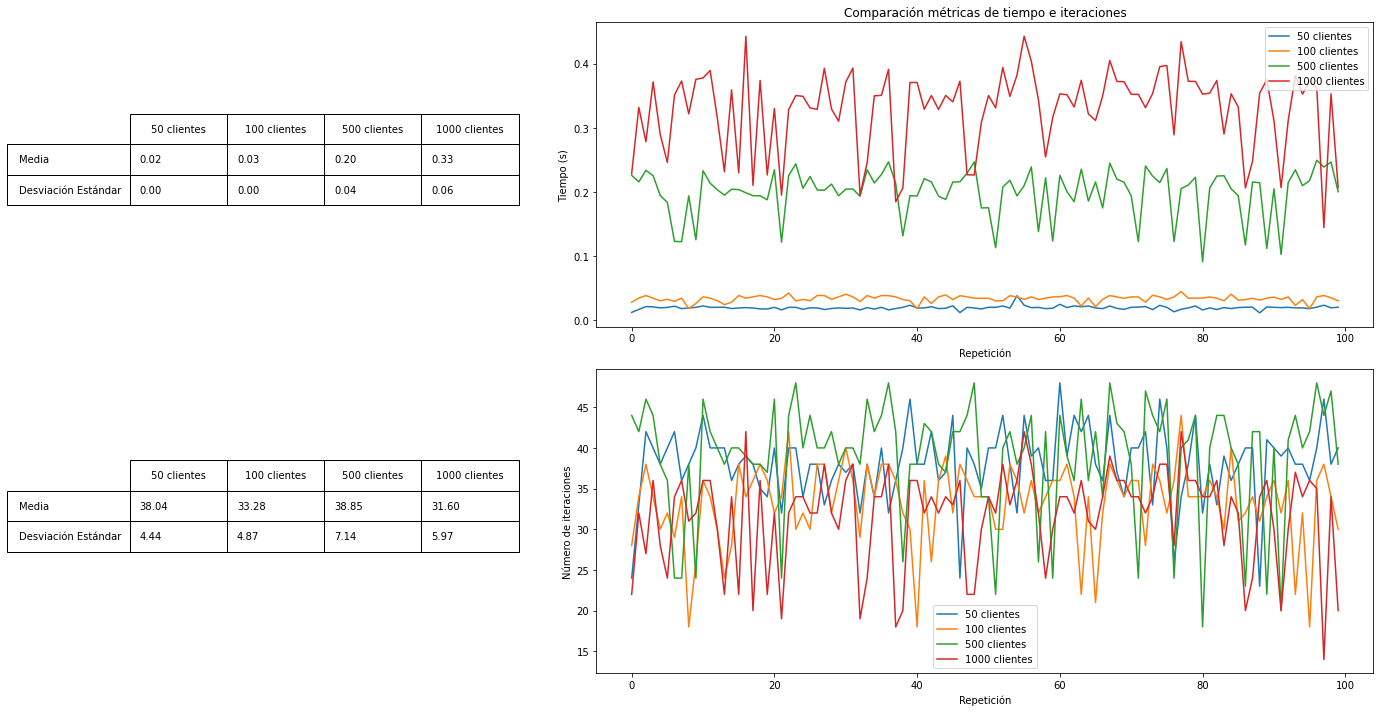

In [31]:

###### Gráfico de comparaciones de tiempos ######

metricas_tiempo = {
    'Media': [df_estadisticos_50['tiempo'].mean(), df_estadisticos_100['tiempo'].mean(), df_estadisticos_500['tiempo'].mean(), df_estadisticos_1000['tiempo'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['tiempo'].std(), df_estadisticos_100['tiempo'].std(), df_estadisticos_500['tiempo'].std(), df_estadisticos_1000['tiempo'].std()],
}


fig, axes = plt.subplots(2,1,figsize=(20,10))

axes[0].plot(df_estadisticos_50['tiempo'], label='50 clientes')
axes[0].plot(df_estadisticos_100['tiempo'], label='100 clientes')
axes[0].plot(df_estadisticos_500['tiempo'], label='500 clientes')
axes[0].plot(df_estadisticos_1000['tiempo'], label='1000 clientes')

axes[0].set_title('Comparación métricas de tiempo e iteraciones')
axes[0].set_xlabel('Repetición')
axes[0].set_ylabel('Tiempo (s)')

axes[0].legend()

table_data_tiempo = [[f'{metrica:.2f}' for metrica in metricas_tiempo[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[0].table(cellText = table_data_tiempo,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])

###### Gráfico de comparaciones de iteraciones ######

metricas_iteraciones = {
    'Media': [df_estadisticos_50['iteraciones'].mean(), df_estadisticos_100['iteraciones'].mean(), df_estadisticos_500['iteraciones'].mean(), df_estadisticos_1000['iteraciones'].mean()],
    'Desviación Estándar' : [df_estadisticos_50['iteraciones'].std(), df_estadisticos_100['iteraciones'].std(), df_estadisticos_500['iteraciones'].std(), df_estadisticos_1000['iteraciones'].std()],
}

axes[1].plot(df_estadisticos_50['iteraciones'], label='50 clientes')
axes[1].plot(df_estadisticos_100['iteraciones'], label='100 clientes')
axes[1].plot(df_estadisticos_500['iteraciones'], label='500 clientes')
axes[1].plot(df_estadisticos_1000['iteraciones'], label='1000 clientes')

axes[1].set_xlabel('Repetición')
axes[1].set_ylabel('Número de iteraciones')

axes[1].legend()

table_data_iteraciones = [[f'{metrica:.2f}' for metrica in metricas_iteraciones[stat]] for stat in metricas_tiempo]
columns = ['50 clientes', '100 clientes', '500 clientes', '1000 clientes']
rows = ['Media', 'Desviación Estándar']

axes[1].table(cellText = table_data_iteraciones,rowLabels=rows, colLabels=columns, cellLoc = 'left', loc='left', bbox = [-0.6, 0.4, 0.5, 0.3])


plt.subplots_adjust(left=0.3, bottom=0.2, hspace=0.5, wspace=0.5)
plt.tight_layout()

plt.show()


## Resultados

### Comparación en tiempo

Los resultados revelan que a medida que tenemos más datos siendo procesados por el algoritmo, va aumentando el costo en tiempo e incluso decir que podría tener un costo que va aumentando de manera casi exponencial, esto se explica ya que, como se pidió en la pregunta 1.2, hay que realizar 100 repeticiones para cada muestra requerida, lo que significa que para las muestras más pequeñas, repetir el proceso 100 veces no va a significar un impacto tan grande como lo es el repetir el proceso para las muestras más grandes, otro factor que también tiene un impacto no menor, es el hecho de que las coordenadas iniciales son puntos al azar, para este problema las coordenadas iniciales son puntos dentro de un rango, este rango corresponde a los mínimos y máximos obtenidos dentro de cada muestra, debido a este factor se podría explicar que la desviación estándar para cada muestra no es tan grande y que aumenta a medida que va creciendo el tamaño de la muestra, a medida que aumenta el número de clientes, los mínimos se van alejando cada vez más de los máximos

### Pregunta 1.4
Para el caso de 1000 clientes. Vamos a comparar el método anterior pero eligiendo un buen punto de partida, no al azar como antes. Use el método de distancia cuadrática como solución para el punto de partida. Reporte el tiempo y el número de iteraciones. ¿Por que este resultado es mejor? 


In [32]:
## Calculamos las coordenadas iniciales con el método de distancia cuadrática ##

# Como vamos a calcularlo solo para el caso de 1000 clientes, podemos calcular las coordenadas iniciales usando el df completo afuera de la función de centro euclidiano

sum_pesos = data.iloc[:,2].sum()

print(sum_pesos)

den_x = 0  
den_y = 0

for i in range(len(data)):
    den_x += (data.iloc[i,0]*data.iloc[i,2])
    den_y += (data.iloc[i,1]*data.iloc[i,2])

print(den_x, den_y)

x_inicial = den_x/sum_pesos
y_inicial = den_y/sum_pesos

print(x_inicial, y_inicial)

df_estadisticos = pd.DataFrame(columns=['x','y','tiempo','iteraciones'])

for i in range(0,100):
    
    posx, posy, tiempo, iteraciones = centro_euclidiano(x_inicial, y_inicial, data, logs=False)
    df_estadisticos.loc[i] = [posx, posy, tiempo, iteraciones]


df_estadisticos.describe()

150868.5339
-586.0032229500265 -532996.14560778
-0.0038841977700827014 -3.5328516280344124


,x,y,tiempo,iteraciones
count,1.000000e+02,1.000000e+02,100.000000,100.0
mean,-2.190571e+00,-4.507432e+00,0.378599,36.0
std,4.463264e-15,5.355917e-15,0.002779,0.0
min,-2.190571e+00,-4.507432e+00,0.375412,36.0
25%,-2.190571e+00,-4.507432e+00,0.377341,36.0
50%,-2.190571e+00,-4.507432e+00,0.378206,36.0
75%,-2.190571e+00,-4.507432e+00,0.378988,36.0
max,-2.190571e+00,-4.507432e+00,0.400207,36.0


# Problema 2

## a)

$$
min  \left(\sum_{j=1}^m\  \sum_{i=1}^n\ C_ij * d_ij * x_ij   \right) \\
$$

In [47]:
data_centros = pd.read_csv('cd2.csv', sep=';')
data_centros.index = range(1, len(data_centros) + 1)

for i in range(len(data_centros)):
    for j in range(len(data_centros.columns)):
        valor = data_centros.iloc[i,j]
        valor = valor.replace(",",".")
        data_centros.iloc[i,j] = valor
data_centros = data_centros.applymap(float)

# data = data.iloc[0:100]
display(data_centros)

data_clientes = data
data_clientes.index = range(1, len(data_clientes) + 1)
display(data_clientes)

,x,y
1,-4.9089,-13.2162
2,7.9829,-6.6164
3,-16.3669,-7.0845
4,-12.8194,-4.2092
5,9.4519,-11.0707
6,12.4499,-11.7062
7,16.6514,6.9430
8,2.2336,-10.4537
9,11.4180,-7.7356
10,-4.8833,-10.8051


,x,y,demanda
1,7.9744,-11.3045,147.1990
2,-13.6786,-3.3825,161.3270
3,-8.8032,-10.3279,172.4834
4,-15.3621,9.4144,133.8201
5,-9.0891,-7.9311,129.8221
...,...,...,...
996,-6.2143,-10.8600,155.4059
997,-11.7203,-2.1472,132.1921
998,6.4149,7.9825,126.1607
999,5.9054,12.7097,156.3924


In [49]:
n = len(data_clientes)
valores_N = list(range(1,n+1))

m = len(data_centros) #cantidad de instalaciones
valores_M = list(range(1,m+1))


conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]

np.random.seed(100)
matriz_c = np.zeros((n,m)) #costo transporte


for i in range(n):      # iterar sobre las filas (clientes)
    for j in range(m):  # iterar sobre las columnas (centros)
        matriz_c[i, j] = (((data_clientes.iloc[i,0]-data_centros.iloc[j,0])**2)+((data_clientes.iloc[i,1]-data_centros.iloc[j,1])**2))


matriz_d = np.zeros((1,n))
for i in range(n):
    matriz_d[0,i]=data_clientes.iloc[i, 2] #demanda clientes


matriz_c, matriz_d

(array([[169.63401578,  21.97835386, 610.30728569, ..., 324.78077561,
         776.96077561, 191.38277561],
        [173.60929378, 479.67869146,  20.93176089, ...,  57.32340421,
         192.62340421, 198.54540421],
        [ 23.50784938, 295.54838546,  67.72920125, ...,   1.53984865,
         414.65584865, 184.16184865],
        ...,
        [577.61332813, 215.58650521, 746.02490024, ..., 592.81924826,
         273.51924826, 104.87124826],
        [789.1013753 , 377.81414746, 887.86570093, ..., 768.71222325,
         260.32422325, 196.41022325],
        [ 57.4424596 , 304.48490144,  47.73363997, ...,   8.39087825,
         294.56687825, 140.64487825]]),
 array([[147.199 , 161.327 , 172.4834, 133.8201, 129.8221, 135.8759,
         137.4951, 116.0237, 176.0073, 182.5082, 211.4392, 178.8036,
         147.2486, 171.5791, 155.7654, 121.0729, 107.4977, 179.2488,
         116.026 , 185.2368, 146.0459, 109.2214, 151.6948, 190.958 ,
         137.9484, 114.0593, 106.5537, 132.4645, 147.1008, 14

In [52]:
problema2 = Model("problema 2")

#Variables de decisión
x_ij = problema2.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij")
y_j = problema2.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j")

#Función objetivo
problema2.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices), GRB.MINIMIZE) #+ quicksum(850*y_j[j] for j in conjunto_M), GRB.MINIMIZE)  #PREGUNTAR SI SE MINIMIZAN TODOS LOS COSTOS O SOLO DE TRANSPORTE

#Restricciones
problema2.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2.addConstrs(x_ij[i,j] <= y_j[j] for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 50000*y_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2.addConstr(quicksum(y_j[j] for j in conjunto_M) == 4)  #se deben hacer 4 centros
problema2.addConstrs(x_ij[i,j]<=1 for (i,j) in indices)

problema2.optimize()

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71036 rows, 35035 columns and 175070 nonzeros
Model fingerprint: 0x434231d4
Variable types: 35000 continuous, 35 integer (35 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 4e+00]
Found heuristic solution: objective 7.253640e+07
Presolve removed 35000 rows and 0 columns
Presolve time: 0.09s
Presolved: 36036 rows, 35035 columns, 140070 nonzeros
Variable types: 35000 continuous, 35 integer (35 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.05s

Solved with dual simplex

Root relaxation: objective 4.400097e+06, 5718 iterations, 1.54 seconds (3.47 work units)

    Nodes    |    Current Node    |    

In [54]:
print(f"los costos mínimos totales son {problema2.ObjVal}")

vars = problema2.getVars()

vars_x = vars[:-m]
variables_activas_x = [var for var in vars_x if var.x != 0]
#variables_activas_x

vars_y = vars[-m:]
variables_activas_y = [var for var in vars_y if var.x != 0]
#variables_activas_y



clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    print(f"En el centro {j} se atienden los clientes: {clientes}")

centros_j


los costos mínimos totales son 4400097.33855695
En el centro 15 se atienden los clientes: [2, 4, 8, 13, 19, 26, 35, 46, 48, 50, 51, 52, 53, 57, 60, 63, 66, 68, 71, 72, 77, 78, 79, 80, 82, 90, 91, 95, 104, 110, 117, 130, 134, 140, 149, 163, 164, 169, 170, 171, 176, 180, 182, 183, 193, 200, 207, 209, 215, 224, 231, 238, 239, 240, 247, 255, 266, 271, 275, 278, 292, 294, 297, 300, 302, 304, 309, 314, 330, 331, 335, 336, 351, 354, 361, 362, 376, 379, 386, 390, 392, 393, 395, 399, 404, 405, 406, 409, 414, 415, 418, 420, 424, 435, 439, 443, 449, 457, 468, 478, 486, 489, 493, 496, 498, 503, 507, 510, 512, 523, 527, 531, 541, 542, 543, 547, 554, 559, 567, 576, 578, 582, 583, 591, 597, 598, 608, 617, 618, 621, 624, 627, 629, 632, 642, 644, 645, 647, 652, 654, 657, 663, 666, 669, 671, 673, 675, 679, 681, 683, 686, 690, 694, 697, 699, 701, 702, 711, 712, 713, 715, 721, 724, 729, 734, 736, 739, 741, 749, 750, 758, 763, 767, 769, 779, 784, 788, 791, 797, 802, 803, 813, 815, 817, 818, 825, 827, 838, 

[15, 31, 32, 33]

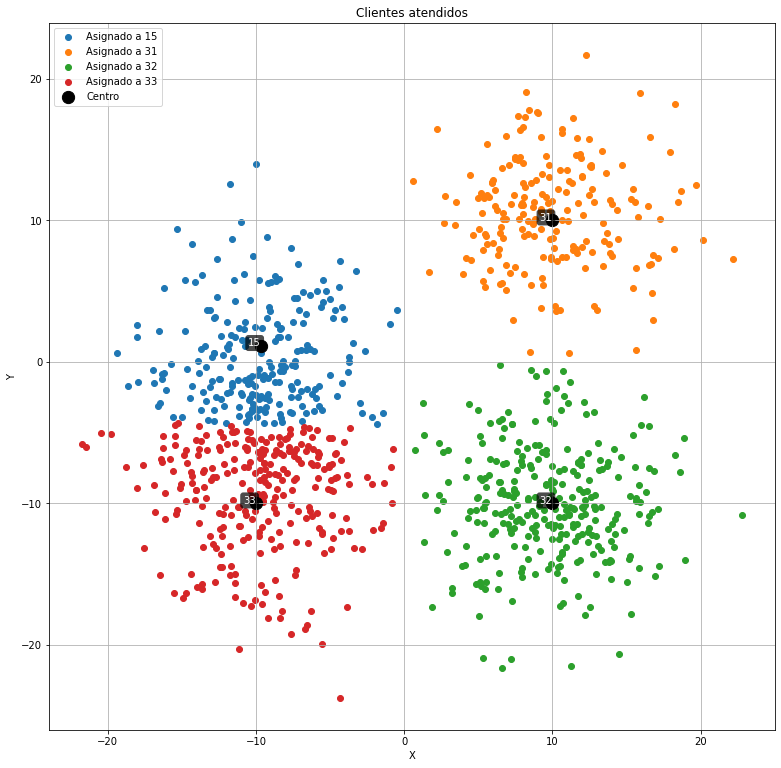

In [55]:
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente



plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')



plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=150, label=f'Centro')

for idx in sub_centros.index:
    plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
            fontsize=10, ha='right', color='white', 
            bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

## b)

$$
min  \left(\sum_{j=1}^m\ ( \sum_{i=1}^n\ C_ij * d_ij * x_ij ) + 200*p_j +450*m_j + 850*g_j  \right) \\
$$

In [56]:
conjunto_N= [i for i in valores_N]
conjunto_M = [j for j in valores_M]
indices = [(i,j) for i in valores_N for j in valores_M]


problema2b = Model("problema 2b")

#Variables de decisión
x_ij = problema2b.addVars(indices, vtype= GRB.CONTINUOUS, name = "x_ij") #porcentaje en el que el cliente i se atiende en el centro j
#y_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "y_j") #1 si se construye el centro j, 0 si no
p_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "p_j") #1 si el centro j se construye y es chico, 0 si no
m_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "m_j") #1 si el centro j se construye y es mediano, 0 si no
g_j = problema2b.addVars(conjunto_M, vtype= GRB.BINARY, name = "g_j") #1 si el centro j se construye y es grande, 0 si no

#Función objetivo
problema2b.setObjective(quicksum(matriz_c[i-1, j-1]*matriz_d[0,i-1]*x_ij[i,j] for (i,j) in indices) + quicksum((200*p_j[j])+(450*m_j[j])+(850*g_j[j]) for j in conjunto_M), GRB.MINIMIZE)  

#Restricciones
problema2b.addConstrs(quicksum(x_ij[i,j] for j in conjunto_M) == 1 for i in conjunto_N) #un centro para cada cliente  #PREGUNTAR SI UN CLIENTE TIENE 1 INSTALACIÓN O SI ES POR PORCENTAJE
problema2b.addConstrs(p_j[j] + m_j[j] + g_j[j] <= 1 for j in conjunto_M) #el centro puede ser o pequeño o mediano o grande (solo 1)
problema2b.addConstrs(x_ij[i,j] <= (p_j[j] + m_j[j] + g_j[j]) for (i,j) in indices)  #si no se hace el centro no se asigna cliente (creo que es redundante)
problema2b.addConstrs(quicksum(matriz_d[0,i-1]*x_ij[i,j] for i in conjunto_N) <= 10000*p_j[j] + 25000*m_j[j] + 50000*g_j[j] for j in conjunto_M)  #suma de demandas menor a la capacidad del centro j
problema2b.addConstrs(x_ij[i,j]<=1 for (i,j) in indices) #el porcentaje de atención es menor o igual a 1 (es un porcentaje)

problema2b.optimize()



Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 71070 rows, 35105 columns and 245210 nonzeros
Model fingerprint: 0x8a8ca9e5
Variable types: 35000 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 5e+04]
  Objective range  [2e+00, 3e+05]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Presolve removed 35000 rows and 0 columns
Presolve time: 0.13s
Presolved: 36070 rows, 35105 columns, 210210 nonzeros
Variable types: 35000 continuous, 105 integer (105 binary)
Deterministic concurrent LP optimizer: primal and dual simplex
Showing primal log only...

Concurrent spin time: 0.01s

Solved with dual simplex

Root relaxation: objective 1.258650e+06, 87 iterations, 0.10 seconds (0.08 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl 

In [58]:
print(f"los costos mínimos totales son {problema2b.ObjVal}")


vars = problema2b.getVars()

vars_x = vars[:-(3*m)]
variables_activas_x = [var for var in vars_x if var.x != 0]
#display(variables_activas_x)

vars_p = vars[len(vars_x):-(2*m)]
variables_activas_p = [var for var in vars_p if var.x != 0]
#display(variables_activas_y)

vars_m = vars[(len(vars_x)+len(vars_p)):-(m)]
variables_activas_m = [var for var in vars_m if var.x != 0]

vars_g = vars[-m:]
variables_activas_g = [var for var in vars_g if var.x != 0]

los costos mínimos totales son 1258865.7557536508


In [59]:
clientes_por_centro = defaultdict(list)
centros_j = set()

for var in variables_activas_x:
    var_name = var.VarName  # Obtiene el nombre de la variable
    # Extraer los índices i y j
    indices = var_name.split('[')[1].split(']')[0]  # Ejemplo: "1,5"
    i, j = map(int, indices.split(','))  # Divide "1,5" en [1, 5]
    
    # Agrupar i por j
    clientes_por_centro[j].append(i)
    centros_j.add(j)

centros_j = sorted(centros_j)

# Mostrar los resultados ordenados por el centro j
for j in sorted(clientes_por_centro):
    clientes = sorted(clientes_por_centro[j])  # Ordenar los clientes también
    print(f"En el centro {j} se atienden los clientes: {clientes}")

En el centro 1 se atienden los clientes: [22, 120, 165, 181, 221, 307, 312, 319, 389, 622, 656, 755, 929, 934]
En el centro 2 se atienden los clientes: [10, 17, 59, 86, 87, 96, 107, 116, 136, 159, 184, 190, 202, 208, 214, 228, 340, 345, 372, 391, 400, 401, 411, 427, 445, 463, 480, 481, 484, 488, 497, 499, 532, 556, 565, 566, 572, 584, 585, 587, 594, 596, 604, 628, 661, 664, 682, 757, 766, 796, 816, 831, 834, 866, 880, 927, 942, 964, 994]
En el centro 3 se atienden los clientes: [75, 141, 158, 160, 225, 245, 298, 324, 349, 360, 433, 471, 492, 519, 610, 662, 722, 808, 962, 966]
En el centro 4 se atienden los clientes: [2, 66, 127, 134, 215, 248, 259, 268, 305, 395, 409, 439, 449, 451, 487, 512, 545, 576, 591, 597, 618, 659, 663, 667, 689, 694, 701, 710, 724, 734, 779, 784, 815, 871, 911, 916, 939, 952, 981, 997]
En el centro 5 se atienden los clientes: [1, 12, 123, 128, 173, 174, 258, 274, 282, 311, 357, 374, 378, 408, 416, 472, 490, 518, 611, 620, 634, 643, 651, 754, 776, 820, 822, 840,

In [60]:

tipos_centros = []

centrosp = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_p}
centrosm = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_m}
centrosg = {int(var.VarName.split('[')[1].split(']')[0]) for var in variables_activas_g}


for centro in centros_j:
    if centro in centrosp:
        tipos_centros.append('pequeño')
    if centro in centrosm:
        tipos_centros.append('mediano')
    if centro in centrosg:
        tipos_centros.append('grande')

for idx in range(1,len(centros_j)):  
    print(f'El centro {centros_j[idx]} es de tipo {tipos_centros[idx]}')

El centro 2 es de tipo pequeño
El centro 3 es de tipo pequeño
El centro 4 es de tipo pequeño
El centro 5 es de tipo pequeño
El centro 6 es de tipo pequeño
El centro 7 es de tipo pequeño
El centro 8 es de tipo pequeño
El centro 9 es de tipo pequeño
El centro 10 es de tipo pequeño
El centro 11 es de tipo pequeño
El centro 12 es de tipo pequeño
El centro 13 es de tipo pequeño
El centro 14 es de tipo pequeño
El centro 15 es de tipo mediano
El centro 16 es de tipo pequeño
El centro 17 es de tipo pequeño
El centro 18 es de tipo pequeño
El centro 19 es de tipo pequeño
El centro 20 es de tipo pequeño
El centro 21 es de tipo pequeño
El centro 22 es de tipo pequeño
El centro 23 es de tipo pequeño
El centro 24 es de tipo pequeño
El centro 25 es de tipo pequeño
El centro 26 es de tipo pequeño
El centro 27 es de tipo pequeño
El centro 28 es de tipo pequeño
El centro 29 es de tipo pequeño
El centro 30 es de tipo pequeño
El centro 31 es de tipo pequeño
El centro 32 es de tipo pequeño
El centro 33 es 

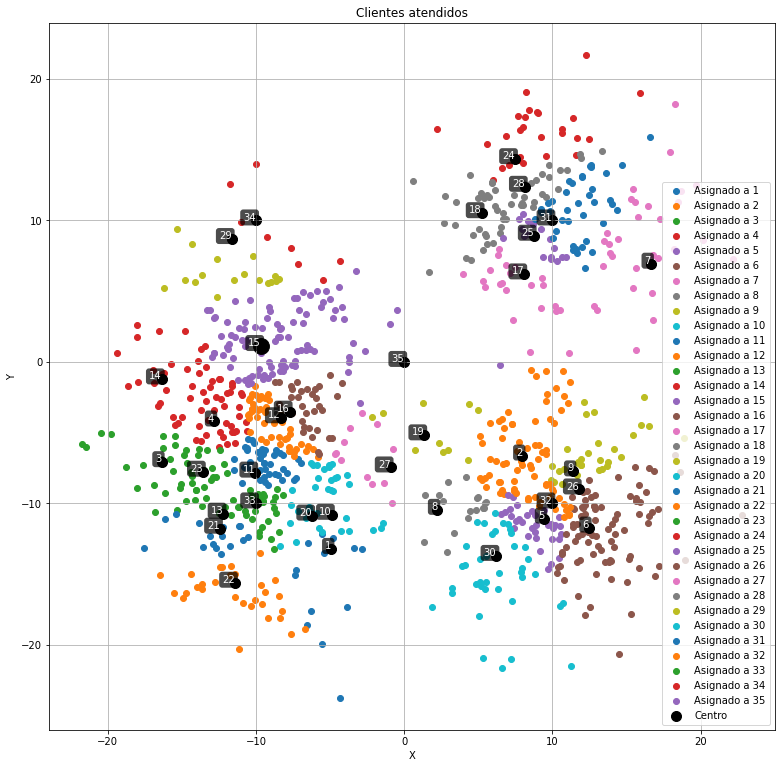

In [61]:
subsets = {}

indices_centros = [i - 1 for i in centros_j]
sub_centros = data_centros.iloc[indices_centros]

for idx, j in enumerate(centros_j):
    indices = [i - 1 for i in clientes_por_centro[j]] #para tener sus índices en el dataframe
    
    subset = data_clientes.iloc[indices] #subset con coordenadas para graficar 
    
    subsets[f'sub{idx}'] = subset #guardamos en diccionario para acceder más fácilmente
    





plt.figure(figsize=(13, 13))

for idx in range(len(centros_j)):
    subset = subsets[f'sub{idx}']
    
    plt.scatter(subset['x'], subset['y'], label=f'Asignado a {centros_j[idx]}')



plt.scatter(sub_centros['x'], sub_centros['y'], color='black', s=100, label=f'Centro')




for idx in sub_centros.index:
    if tipos_centros[idx-1] == "pequeño":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=80)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                fontsize=10, ha='right', color='white', 
                bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    if tipos_centros[idx-1] == "mediano":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=250)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                fontsize=10, ha='right', color='white', 
                bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))
    if tipos_centros[idx-1] == "grande":
        plt.scatter(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], color='black', s=300)
        plt.text(sub_centros.loc[idx, 'x'], sub_centros.loc[idx, 'y'], f'{idx}', 
                fontsize=10, ha='right', color='white', 
                bbox=dict(facecolor='black', alpha=0.7, edgecolor='none', boxstyle='round,pad=0.3'))


plt.title(f'Clientes atendidos')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(True)
    

plt.show()

# Problema 3

Opcion 1 modelo
Se quiere mínimizar la suma de las distancias totales hacia el centro

$$\begin{array}{rl}
\min & \sum_{i=1}^n\sum_{j=1}^m\ d_{ij}x_{ij}\\
\text{s.t.} & \\
& \sum_{i=1}^n x_{ij} = 1 \qquad \forall j \in [1:m] \\
& \sum_{j=1}^m x_{ij} \leq 1 \qquad \forall i \in [1:n] \\
& x_{ij} \in \{0,1\} \qquad \forall i \in [1:n] ,\forall j \in [m]
\end{array}$$ 


Donde $d_{ij}$ representa la estacion $i$ asignada al lugar $j$. Y $x_{ij}$ sea variable binaria que toma el valor 1 si la estacion $i$ es asignado a la ubicacion $j$ y 0 si no.


hay que ver si tiene sentido:)

$$\begin{array}{rl}
\min & \sum_{i=1}^n\ d((x,y),(a_{i},b_{i}))\\
\text{s.t.} & \\
& \sum_{i=1}^n x_{ij} = 1 \qquad \forall j \in [1:m] \\
& \sum_{j=1}^m x_{ij} \leq 1 \qquad \forall i \in [1:n] \\
& x_{ij} \in \{0,1\} \qquad \forall i \in [1:n] ,\forall j \in [m]
\end{array}$$ 

Opción 2 \
\
Se quiere minimizar la distancia entre ubicaciones en un espacio bidimensional. La distancia euclidiana entre el centro de la habitación hacia los puestos de los operadores se define como:
$$
min  \sum_{i=1}^n\ d((x,y),(a_{i},b_{i}))\\
$$
Donde d representa el calculo de la distancia desde el punto centro (x,y) y cada uno de los puestos operadores con coordenadas (a_i,b_i)
$$
\text{s.t.}\\
2 \leq x_i \leq 10,\quad 2 \leq y_i \leq 8 \quad \forall i
$$
Ninguna ubicación puede quedar a menos de dos metros de las paredes
$$
\sqrt{(x_i - a_i)^2 + (y_i - b_i)^2} \geq 3, \quad \forall i \neq j
$$
La distancia entre cualquiera de las estaciones debe ser al menos de 3 metros

Pregunta 3b.1\
\
Método centro de gravedad (distancia euclidiana)
$$
min  \left(\sum_{i=1}^n\ d(x, y), (a_i, b_i) \right) = \sqrt{(x - a_i)^2 + (y - b_i)^2}\\
$$
$$
\text{s.t.}\\
2 \leq x_i \leq 10,\quad 2 \leq y_i \leq 8 \quad \forall i
$$
$$
\sqrt{(x_i - a_i)^2 + (y_i - b_i)^2} \geq 3, \quad \forall i \neq j
$$
$$
\sqrt{(x_i - a_i)^2 + (y_i - b_i)^2} \geq 3, \quad \forall i \neq j
$$

In [46]:
import gurobipy as gp
from gurobipy import GRB

def euclidean_distance(coordinates):
    """
    Calcula la distancia euclidiana desde el centro fijo (0, 0) hacia las coordenadas dadas,
    asegurando que ninguna ubicación quede a menos de 2 metros de las paredes.
    """
    # Crear un nuevo modelo
    model = gp.Model("euclidean_distance")

    # Función objetivo
    obj = 0
    for ai, bi in coordinates:
        # Verificar que las coordenadas estén dentro del rango permitido con el ajuste de 2 metros
        if not (-3 <= ai <= 3 and -2 <= bi <= 2):
            print(f"Coordenadas ({ai}, {bi}) fuera del rango permitido.")
            return
        
        # Distancia euclidiana al centro (0, 0)
        distance = model.addVar(name=f"distance_{ai}_{bi}")
        model.addQConstr(distance * distance == ai**2 + bi**2)
        obj += distance

    model.setObjective(obj, GRB.MINIMIZE)

    # Restricción: la distancia mínima entre las estaciones debe ser al menos 3 unidades
    for i in range(len(coordinates)):
        for j in range(i + 1, len(coordinates)):
            ai, bi = coordinates[i]
            aj, bj = coordinates[j]
            model.addQConstr((ai - aj)**2 + (bi - bj)**2 >= 9, name=f"DistanciaMin_{i}_{j}")

    # Ejecutar la optimización
    model.optimize()

    # Para obtener la solución
    if model.status == GRB.OPTIMAL:
        print("Optimización completada:")
        for i, (ai, bi) in enumerate(coordinates):
            dist_var = model.getVarByName(f"distance_{ai}_{bi}")
            print(f"Distancia al punto (0, 0) desde la estación {i+1} (ubicada en {ai}, {bi}): {dist_var.X:.2f} unidades")
    else:
        print("No se encontró una solución óptima")

# Llamar a la función con las coordenadas de las estaciones (ajustadas para el sistema de la imagen)
coordenadas_estaciones = [(2, 1), (3, -1), (-2, 1), (-1, -2)]
euclidean_distance(coordenadas_estaciones)



Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[rosetta2] - Darwin 23.6.0 23G93)

CPU model: Apple M2
Thread count: 8 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 6 rows, 4 columns and 0 nonzeros
Model fingerprint: 0x88720497
Model has 4 quadratic constraints
Coefficient statistics:
  Matrix range     [0e+00, 0e+00]
  QMatrix range    [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+00]
  QRHS range       [5e+00, 1e+01]
Presolve time: 0.00s

Barrier solved model in 0 iterations and 0.00 seconds (0.00 work units)
Model is infeasible
No se encontró una solución óptima
